In [6]:
import pandas as pd
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

#Part-1

In [8]:
df=pd.read_csv(r"D:\Stock Market\Stock_Market_Data.csv")
df.head()

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19


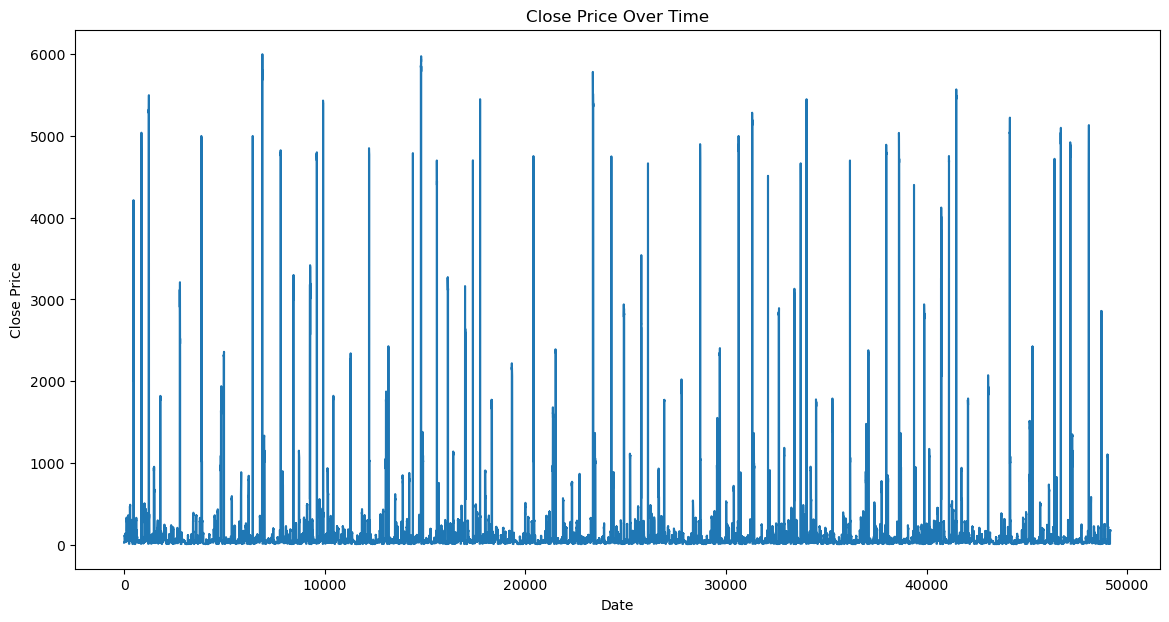

In [9]:
######Calculate basic summary statistics for each column (mean, median, standard deviation, etc.).
summary_stats = df.describe()

######Explore the distribution of the 'Close' prices over time.
plt.figure(figsize=(14,7))
plt.plot(df['Close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()
#####Identify and analyze any outliers (if any) in the dataset.
z_scores = (df['Close'] - df['Close'].mean()) / df['Close'].std()
outliers = df[abs(z_scores) > 3]


In [10]:
df

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19
...,...,...,...,...,...,...,...
49153,26-06-2022,ZEALBANGLA,169.00,174.90,169.00,170.30,10480.00
49154,27-06-2022,ZEALBANGLA,174.10,176.00,166.90,167.50,13817.00
49155,28-06-2022,ZEALBANGLA,170.00,170.90,167.00,168.10,5214.00
49156,29-06-2022,ZEALBANGLA,167.10,169.00,164.90,165.10,6678.00


<Axes: title={'center': 'Stock Prices Over Time'}>

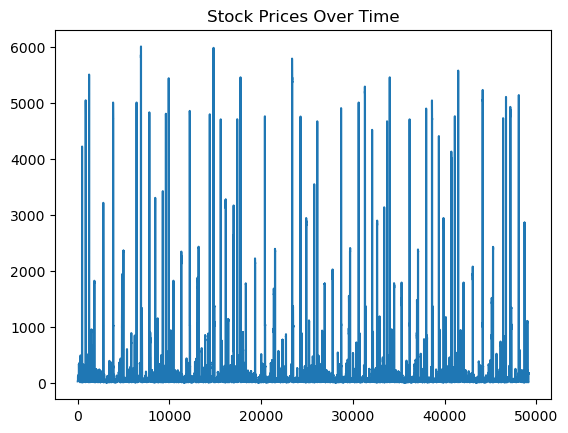

In [14]:
#####Part 2
####Create a line chart to visualize the 'Close' prices over time.
df['Close'].plot(title='Stock Prices Over Time')



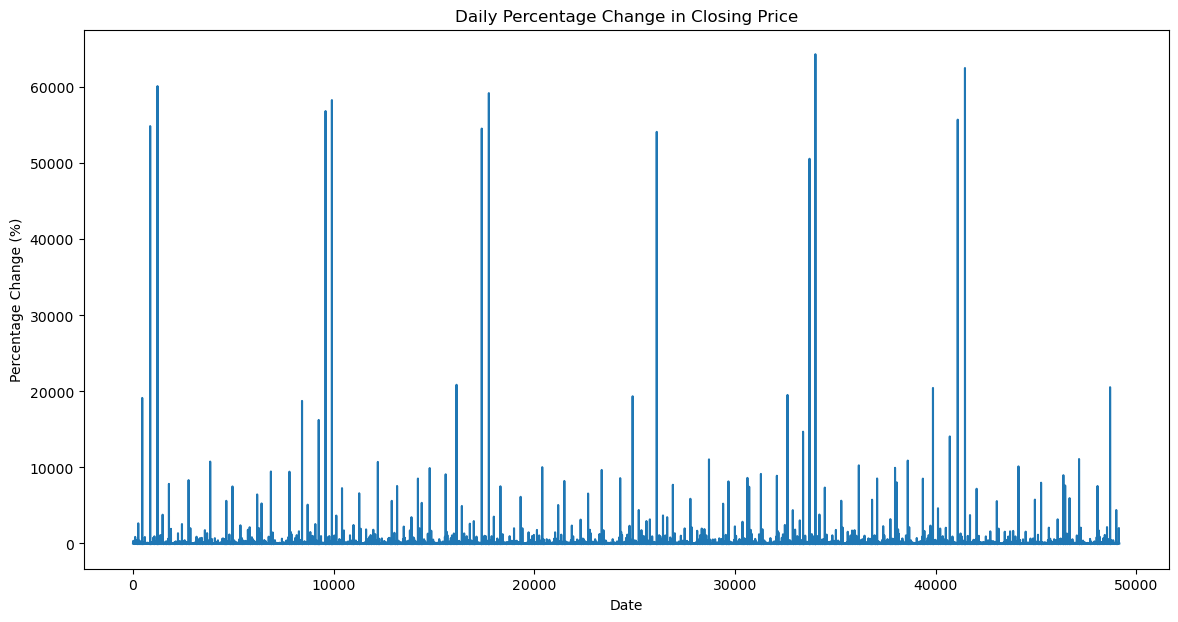

In [15]:
####Calculate and plot the daily percentage change in closing prices.
df['Daily_Return'] = df['Close'].pct_change() * 100

plt.figure(figsize=(14,7))
plt.plot(df['Daily_Return'])
plt.title('Daily Percentage Change in Closing Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.show()

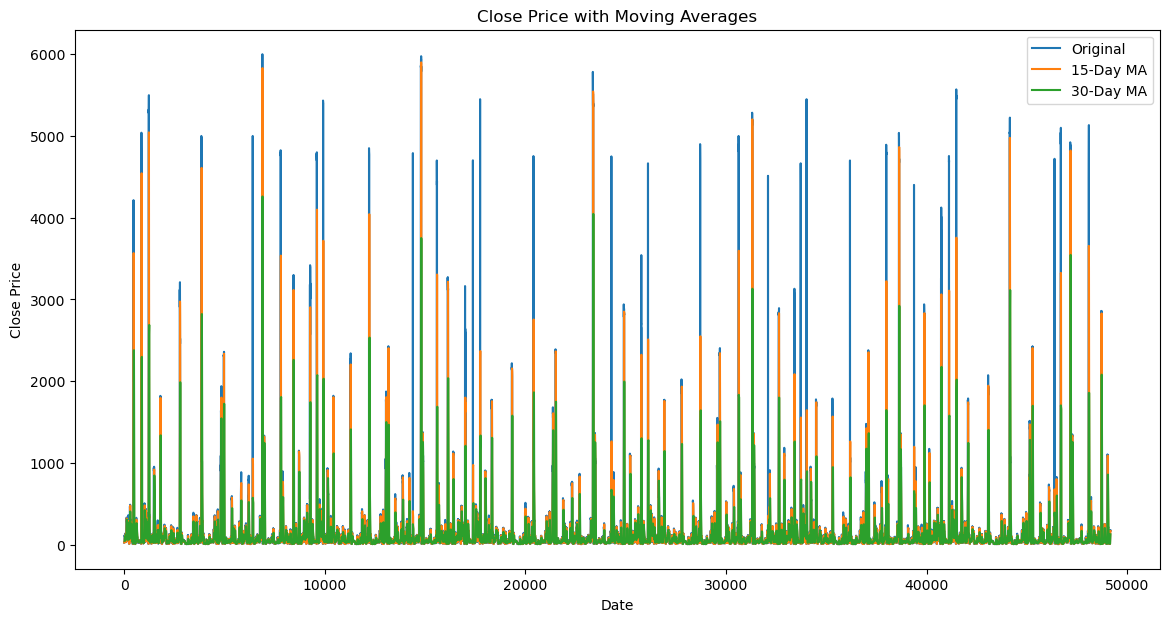

In [21]:
####Investigate the presence of any trends or seasonality in the stock prices.

####Apply moving averages to smooth the time series data in 15/30 day intervals against the original graph.
df['MA_15'] = df['Close'].rolling(window=15).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Original')
plt.plot(df['MA_15'], label='15-Day MA')
plt.plot(df['MA_30'], label='30-Day MA')
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [17]:
########Calculate the average closing price for each stock.
import pandas as pd


average_closing_prices = df.groupby('Name')['Close'].mean().reset_index()

top_5_stocks = average_closing_prices.nlargest(5, 'Close')
bottom_5_stocks = average_closing_prices.nsmallest(5, 'Close')


print("Top 5 stocks based on average closing price:")
print(top_5_stocks)
print("\nBottom 5 stocks based on average closing price:")
print(bottom_5_stocks)



Top 5 stocks based on average closing price:
           Name        Close
56    APSCLBOND  5413.238636
320  RECKITTBEN  5342.024793
298   PREBPBOND  4918.357143
178  IBBL2PBOND  4851.330357
283    PBLPBOND  4836.195652

Bottom 5 stocks based on average closing price:
           Name     Close
144   FAMILYTEX  4.698361
187    ICBIBANK  4.725620
149       FBFIF  5.289344
293  POPULAR1MF  5.368033
291      PHPMF1  5.417213


In [16]:
####Identify the top 5 and bottom 5 stocks based on average closing price.
import pandas as pd



average_closing_prices = df.groupby('Name')['Close'].mean()


top_5_stocks = average_closing_prices.sort_values(ascending=False).head(5)


bottom_5_stocks = average_closing_prices.sort_values(ascending=True).head(5)

top_5_stocks, bottom_5_stocks



(Name
 APSCLBOND     5413.238636
 RECKITTBEN    5342.024793
 PREBPBOND     4918.357143
 IBBL2PBOND    4851.330357
 PBLPBOND      4836.195652
 Name: Close, dtype: float64,
 Name
 FAMILYTEX     4.698361
 ICBIBANK      4.725620
 FBFIF         5.289344
 POPULAR1MF    5.368033
 PHPMF1        5.417213
 Name: Close, dtype: float64)

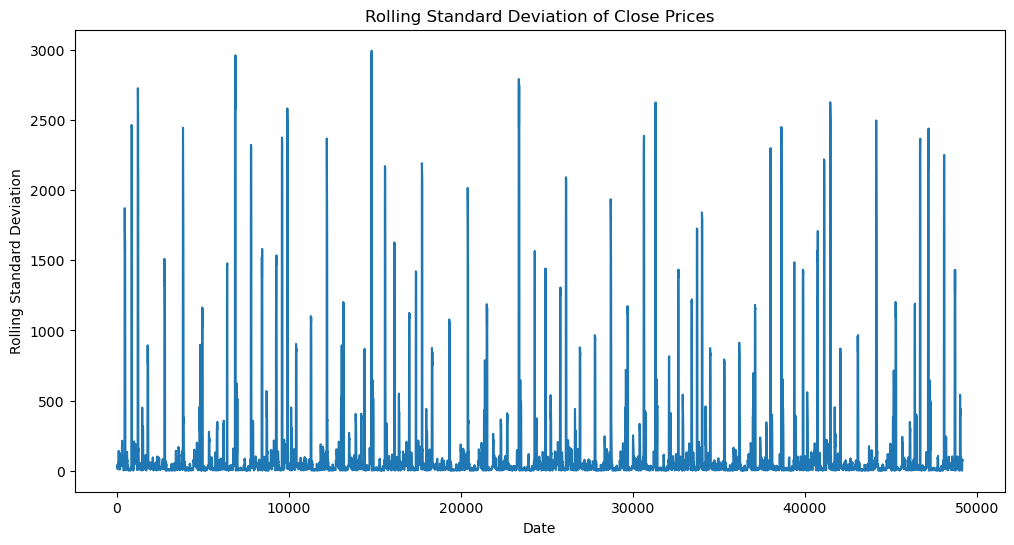

In [18]:
####Part 3
####Calculate and plot the rolling standard deviation of the 'Close' prices.

df['Rolling_Std'] = df['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
df['Rolling_Std'].plot(title='Rolling Standard Deviation of Close Prices')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.show()







In [21]:
####Create a new column for daily price change (Close - Open).
df['Daily_Price_Change'] = df['Close'] - df['Open']
df

,Date,Name,Open,High,Low,Close,Volume,Rolling_Std,Daily_Price_Change
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41,NaN,0.10
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63,NaN,-0.13
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97,NaN,-0.01
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81,NaN,0.07
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19,NaN,0.25
...,...,...,...,...,...,...,...,...,...
49153,26-06-2022,ZEALBANGLA,169.00,174.90,169.00,170.30,10480.00,79.893906,1.30
49154,27-06-2022,ZEALBANGLA,174.10,176.00,166.90,167.50,13817.00,78.581206,-6.60
49155,28-06-2022,ZEALBANGLA,170.00,170.90,167.00,168.10,5214.00,76.880561,-1.90
49156,29-06-2022,ZEALBANGLA,167.10,169.00,164.90,165.10,6678.00,74.677983,-2.00


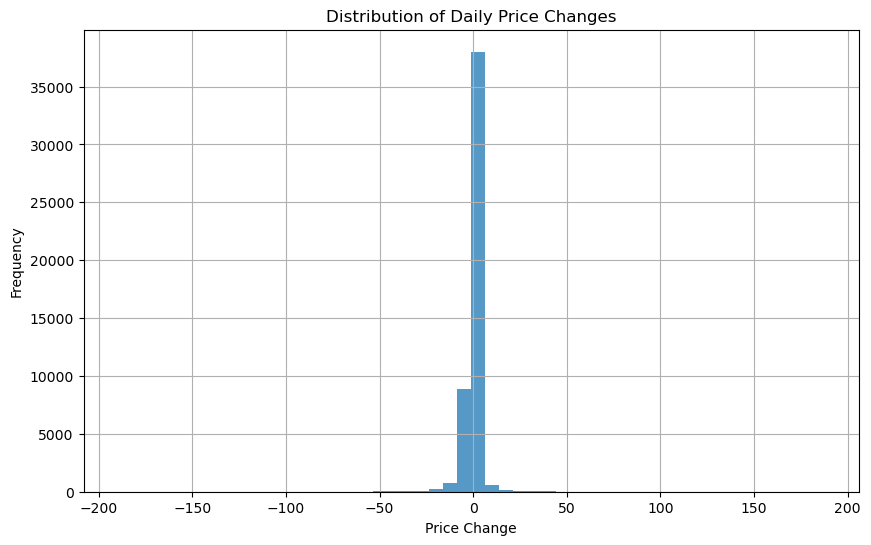

In [22]:
####Analyze the distribution of daily price changes.
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Daily_Price_Change'], bins=50, alpha=0.75)
plt.title('Distribution of Daily Price Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [23]:
####dentify days with the largest price increases and decreases.

largest_increase = df.loc[df['Daily_Price_Change'].idxmax()]


largest_decrease = df.loc[df['Daily_Price_Change'].idxmin()]


print("Day with the largest price increase:")
print(largest_increase)

print("\nDay with the largest price decrease:")
print(largest_decrease)


Day with the largest price increase:
Date                   29-06-2022
Name                   SJIBLPBOND
Open                       4710.0
High                       4899.0
Low                        4710.0
Close                      4897.0
Volume                      101.0
Rolling_Std           2184.394521
Daily_Price_Change          187.0
Name: 48081, dtype: object

Day with the largest price decrease:
Date                   07-03-2022
Name                   RECKITTBEN
Open                       5753.0
High                       5753.0
Low                        5550.0
Close                      5563.8
Volume                     1876.0
Rolling_Std           2144.092378
Daily_Price_Change         -189.2
Name: 23365, dtype: object


In [24]:
####Identify stocks with unusually high trading volume on certain days.

mean_volume = df['Volume'].mean()
std_volume = df['Volume'].std()


threshold = mean_volume + 2 * std_volume


unusual_volume_days = df[df['Volume'] > threshold]


print("Days with unusually high trading volume:")
print(unusual_volume_days)




Days with unusually high trading volume:
             Date                       Name   Open   High    Low  Close  \
52     12-01-2022         03.Ceramics_Sector  76.46  79.04  75.30  77.32   
54     16-01-2022         03.Ceramics_Sector  78.06  81.36  76.96  79.48   
319    17-01-2022  15.Services_&_Real_Estate  60.18  61.83  59.28  61.15   
320    18-01-2022  15.Services_&_Real_Estate  63.03  66.15  59.05  64.75   
321    19-01-2022  15.Services_&_Real_Estate  64.30  65.85  61.98  63.30   
...           ...                        ...    ...    ...    ...    ...   
49075  08-06-2022                        YPL  21.70  23.00  21.70  22.70   
49081  16-06-2022                        YPL  22.80  23.70  22.80  23.30   
49089  28-06-2022                        YPL  22.80  23.60  21.90  23.60   
49090  29-06-2022                        YPL  24.30  24.60  23.30  23.40   
49091  30-06-2022                        YPL  23.50  24.20  23.00  23.30   

           Volume  Rolling_Std  Daily_Price_Ch

In [ ]:
####part 4

In [25]:
#####Explore the relationship between trading volume and volatility.
df['Volatility'] = df['High'] - df['Low']


correlation_volume_volatility = df['Volume'].corr(df['Volatility'])


print(f"Correlation between trading volume and volatility: {correlation_volume_volatility}")

Correlation between trading volume and volatility: -0.07613982435013261


In [26]:
#####Calculate the correlation matrix between the 'Open' & 'High', 'Low' &'Close' prices.


correlation_matrix = df[['Open', 'High', 'Low', 'Close']].corr()


print("Correlation matrix between 'Open', 'High', 'Low', and 'Close':")
print(correlation_matrix)


Correlation matrix between 'Open', 'High', 'Low', and 'Close':
           Open      High       Low     Close
Open   1.000000  0.999940  0.999939  0.999925
High   0.999940  1.000000  0.999887  0.999942
Low    0.999939  0.999887  1.000000  0.999961
Close  0.999925  0.999942  0.999961  1.000000


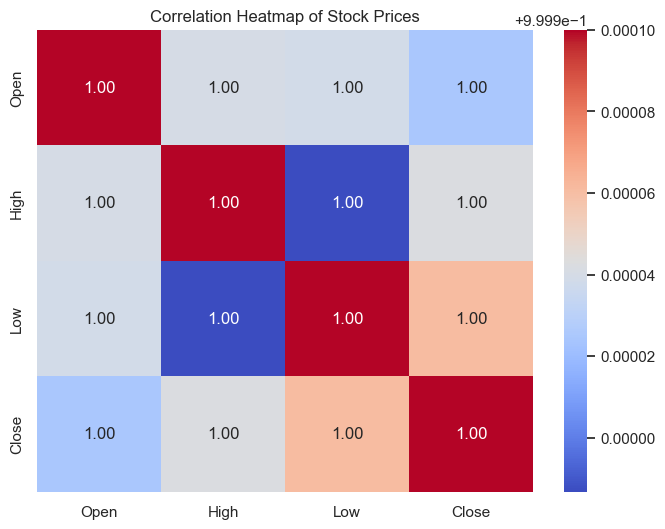

In [30]:
####Create a heatmap to visualize the correlations using the seaborn package.
sns.set(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Stock Prices')
plt.show()
